In [181]:
import pandas as pd
import pickle
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from matplotlib.pyplot import figure

In [182]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

In [183]:
input_path_files = "../input_files/spelling_correction_dicts"

## Overlap and Scoring Functions

In [184]:
def overlap(dict_1, dict_2, dict_1_name, dict_2_name, data_name, comparison_name):
    
    path = "results/" + data_name + "/" + comparison_name + "/"
    
    both_correct_count = 0
    dict_1_correct_count = 0
    dict_2_correct_count = 0
    
    both_correct_list = []
    dict_1_correct_list = []
    dict_2_correct_list = []
    
    for key in dict_1.keys():
        
        if dict_1[key]['suggested'] == dict_2[key]['suggested']:
            if dict_1[key]['suggested'] == dict_1[key]['correct_spelling']:
                both_correct_count +=1
                mispelling = key
                suggestion = dict_1[key]['correct_spelling']
                both_correct_list.append({'Mispelling':mispelling, 'Suggestion':suggestion})
                
        elif dict_1[key]['suggested'] == dict_1[key]['correct_spelling']:
            dict_1_correct_count += 1
            mispelling = key
            suggestion = dict_1[key]['correct_spelling']
            dict_1_correct_list.append({'Mispelling':mispelling, 'suggestion':suggestion})
            
            
        elif dict_2[key]['suggested'] == dict_2[key]['correct_spelling']:
            dict_2_correct_count +=1
            mispelling = key
            suggestion = dict_2[key]['correct_spelling']
            dict_2_correct_list.append({'Mispelling':mispelling, 'Suggestion':suggestion})
        
    df_both = pd.DataFrame(both_correct_list)
    df_dict_1 = pd.DataFrame(dict_1_correct_list)
    df_dict_2 = pd.DataFrame(dict_2_correct_list)
    
    df_both.to_csv((path+'both.csv'),index=False)
    df_dict_1.to_csv((path+dict_1_name+'.csv'),index=False)
    df_dict_2.to_csv((path+dict_2_name+'.csv'),index=False)
    
    return({'both':both_correct_count, dict_1_name:dict_1_correct_count, dict_2_name:dict_2_correct_count})
        

In [185]:
def score_application(name, input_dict):
    correct = 0
    luck = 0
    for misspelling, results in input_dict.items():    
        if results['correct_spelling'] == results['suggested']:
            correct += 1
        if results['correct_spelling'] in results['candidates']:
            luck += 1
            
    correct_and_luck = correct + luck
    
    results = {'Spelling Application':name, 'Correct':correct, 'Luck':luck, 'Correct_and_Luck':correct_and_luck}

    return results

## 1.1 Holbrook Data Analysis

In [186]:
# Load Holbrook Spelling dictionaries
file_name_h_pyspell = Path(input_path_files) / "holbrook_pyspell_dict.txt"
holbrook_pyspell = pickle.load(open(file_name_h_pyspell, "rb"))

file_name_h_symspell = Path(input_path_files) / "holbrook_symspell_dict.txt"
holbrook_symspell = pickle.load(open(file_name_h_symspell, "rb"))

file_name_h_phonemes = Path(input_path_files) / "holbrook_phonemes_sym.txt"
holbrook_phonemes = pickle.load(open(file_name_h_phonemes, "rb"))

In [187]:
# Retrieve number of correct results for each method
df_spellcheck_vs_cmu = pd.DataFrame(columns=['Spelling Application', 'Correct', 'Luck', 'Correct_and_Luck'])
results_data = []
results_data.append(score_application('PySpell', holbrook_pyspell))
results_data.append(score_application('CMU Phonemes', holbrook_phonemes))
results_data.append(score_application('SymSpell', holbrook_symspell))
df_spellcheck_vs_cmu.append(results_data)

,Spelling Application,Correct,Luck,Correct_and_Luck
0,PySpell,448,633,1081
1,CMU Phonemes,355,133,488
2,SymSpell,429,474,903


In [201]:
print("PySpell Accuracy:",448/len(holbrook_pyspell)*100)
print("SymSpell Accuracy:",429/len(holbrook_symspell)*100)
print("Phonemes Accuracy:",355/len(holbrook_phonemes)*100)

PySpell Accuracy: 28.681177976952625
SymSpell Accuracy: 27.464788732394368
Phonemes Accuracy: 22.727272727272727


## 1.2 Holbrook Overlap

### Overlap Holbrook - PySpell vs CMU 0.5 (Phoneme Correction with frequency dictionary)

In [117]:
overlap(holbrook_pyspell, holbrook_phonemes, 'pyspell', 'cmu_phonemes', 'holbrook', 'pyspell_cmu_phonemes')

{'both': 179, 'pyspell': 269, 'cmu_phonemes': 176}

#### Version 2 Results - Improved Implementation

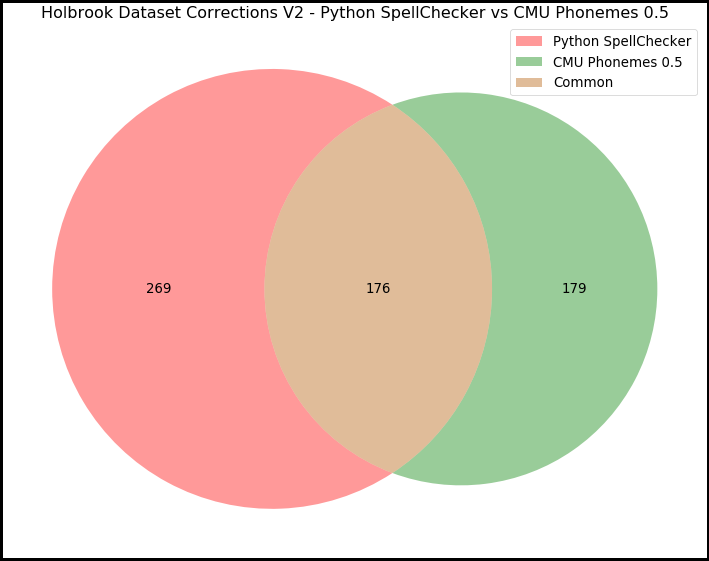

In [172]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(15,12), dpi=60)
venn2(subsets=(269,179,176), set_labels=('','',''))
plt.legend(labels=['Python SpellChecker', 'CMU Phonemes 0.5','Common'])
plt.title('Holbrook Dataset Corrections V2 - Python SpellChecker vs CMU Phonemes 0.5')
plt.show()

#### Version 1 Results - Elsa's Initial Implementation

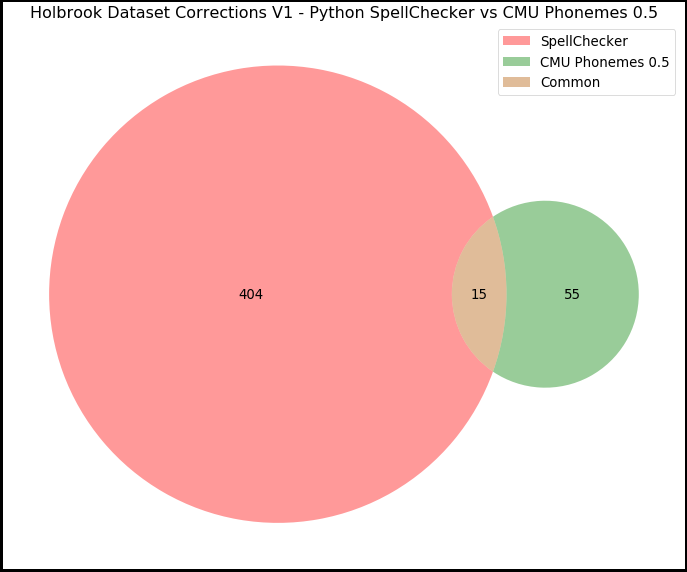

In [173]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(15,12), dpi=60)
venn2(subsets=(404,55,15), set_labels=('','',''))
plt.legend(labels=['SpellChecker', 'CMU Phonemes 0.5','Common'])
plt.title('Holbrook Dataset Corrections V1 - Python SpellChecker vs CMU Phonemes 0.5')
plt.show()

### Overlap Holbrook - SymSpell vs CMU 0.5 (Phoneme Correction with frequency dictionary)

In [120]:
overlap(holbrook_symspell, holbrook_phonemes, 'symspell', 'cmu_phonemes', 'holbrook', 'symspell_cmu_phonemes')

{'both': 179, 'symspell': 250, 'cmu_phonemes': 176}

#### Version 1 Results - No previous use of SymSpell

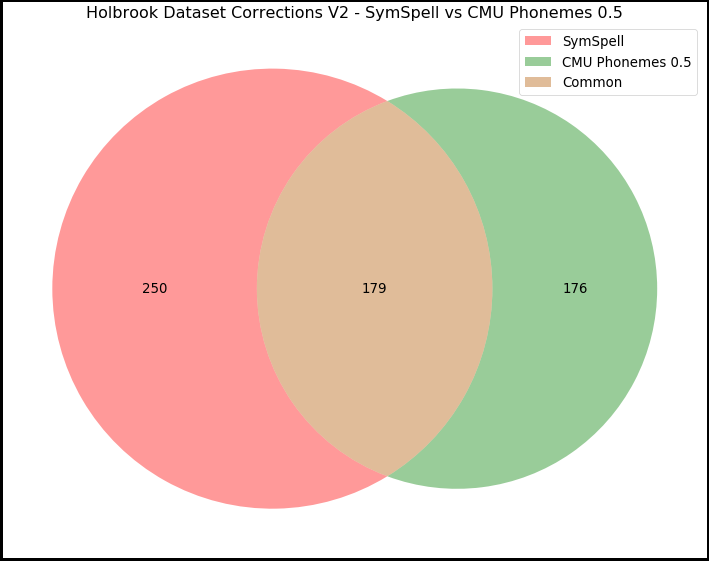

In [174]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(15,12), dpi=60)
venn2(subsets=(250,176,179), set_labels=('','',''))
plt.legend(labels=['SymSpell', 'CMU Phonemes 0.5','Common'])
plt.title('Holbrook Dataset Corrections V2 - SymSpell vs CMU Phonemes 0.5')
plt.show()

### Overlap Holbrook - SymSpell vs Phoneme 0.5 (using symspell dict for phonemes instead of cmu)

## 2.1 Birckbeck Data Analysis

In [202]:
# Load Birkbeck Spelling dictionaries
file_name_b_pyspell = Path(input_path_files) / "birkbeck_pyspell_dict.txt"
birkbeck_pyspell = pickle.load(open(file_name_b_pyspell, "rb"))

file_name_b_symspell = Path(input_path_files) / "birkbeck_symspell_dict.txt"
birkbeck_symspell = pickle.load(open(file_name_b_symspell, "rb"))

file_name_b_phonemes = Path(input_path_files) / "birkbeck_phonemes_sym.txt"
birkbeck_phonemes = pickle.load(open(file_name_b_phonemes, "rb"))

In [131]:
df_spellcheck_vs_cmu = pd.DataFrame(columns=['Spelling Application', 'Correct', 'Luck', 'Correct_and_Luck'])
results_data = []
results_data.append(score_application('PySpell', birkbeck_pyspell))
results_data.append(score_application('CMU Phonemes', birkbeck_phonemes))
results_data.append(score_application('SymSpell', birkbeck_symspell))

#### Birkbeck Results

In [133]:
df_spellcheck_vs_cmu.append(results_data)

,Spelling Application,Correct,Luck,Correct_and_Luck
0,PySpell,11767,14148,25915
1,CMU Phonemes,9048,718,9766
2,SymSpell,11773,6653,18426


In [204]:
print("PySpell Accuracy:",11767/len(birkbeck_pyspell)*100)
print("SymSpell Accuracy:",11773/len(birkbeck_symspell)*100)
print("Phonemes Accuracy:",9048/len(birkbeck_phonemes)*100)

PySpell Accuracy: 34.72423053088205
SymSpell Accuracy: 34.74193643580134
Phonemes Accuracy: 26.7005046182902


## Birkbeck Overlap

### Overlap Holbrook - PySpell vs CMU 0.5 (Phoneme Correction with frequency dictionary)

In [134]:
overlap(birkbeck_pyspell, birkbeck_phonemes, 'pyspell', 'cmu_phonemes', 'birkbeck', 'pyspell_cmu_phonemes')

{'both': 5477, 'pyspell': 6290, 'cmu_phonemes': 3571}

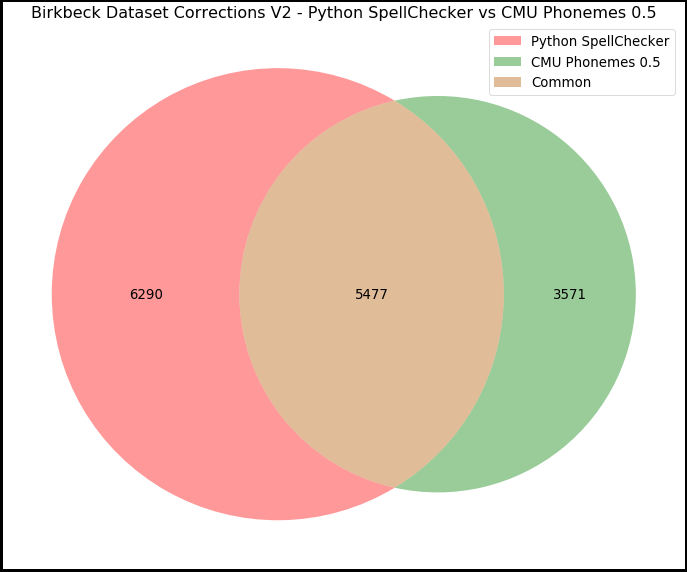

In [175]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(15,12), dpi=60)
venn2(subsets=(6290,3571,5477), set_labels=('','',''))
plt.legend(labels=['Python SpellChecker', 'CMU Phonemes 0.5','Common'])
plt.title('Birkbeck Dataset Corrections V2 - Python SpellChecker vs CMU Phonemes 0.5')
plt.show()

#### Version 1 Results - Elsa's Initial Implementation

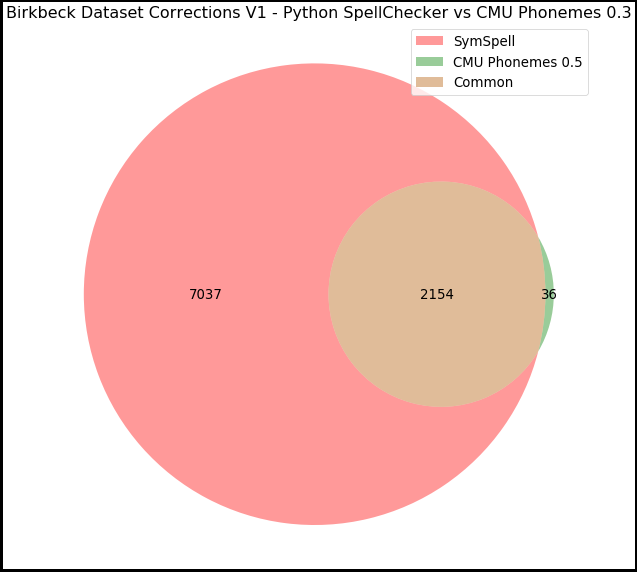

In [179]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(15,12), dpi=60)
venn2(subsets=(7037,36,2154), set_labels=('','',''))
plt.legend(labels=['SymSpell', 'CMU Phonemes 0.5','Common'])
plt.title('Birkbeck Dataset Corrections V1 - Python SpellChecker vs CMU Phonemes 0.3')
plt.show()

### Overlap Holbrook - SymSpell vs CMU 0.5 (Phoneme Correction with frequency dictionary)

In [136]:
overlap(birkbeck_symspell, birkbeck_phonemes, 'symspell', 'cmu_phonemes', 'birkbeck', 'symspell_cmu_phonemes')

{'both': 5544, 'symspell': 6229, 'cmu_phonemes': 3504}

#### Version 1 Results - No previous use of SymSpell

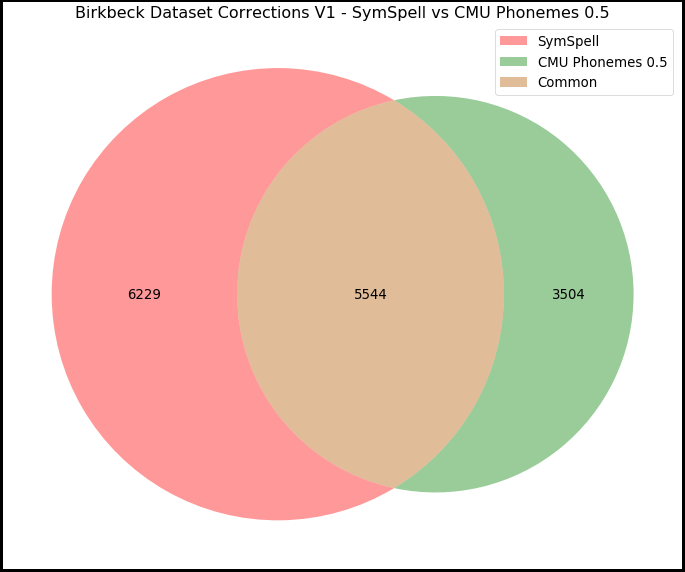

In [176]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(15,12), dpi=60)
venn2(subsets=(6229,3504,5544), set_labels=('','',''))
plt.legend(labels=['SymSpell', 'CMU Phonemes 0.5','Common'])
plt.title('Birkbeck Dataset Corrections V1 - SymSpell vs CMU Phonemes 0.5')
plt.show()

# X.1 Zeeko Data Analysis

In [158]:
file_name_z_pyspell = Path(input_path_files) / "zeeko_pyspell_dict.txt"
zeeko_pyspell = pickle.load(open(file_name_z_pyspell, "rb"))

file_name_z_symspell = Path(input_path_files) / "zeeko_symspell_dict.txt"
zeeko_symspell = pickle.load(open(file_name_z_symspell, "rb"))

file_name_z_phonemes = Path(input_path_files) / "zeeko_phonemes_sym.txt"
zeeko_phonemes = pickle.load(open(file_name_z_phonemes, "rb"))

In [159]:
df_spellcheck_vs_cmu = pd.DataFrame(columns=['Spelling Application', 'Correct', 'Luck', 'Correct_and_Luck'])
results_data = []
results_data.append(score_application('PySpell', zeeko_pyspell))
results_data.append(score_application('CMU Phonemes', zeeko_phonemes))
results_data.append(score_application('SymSpell', zeeko_symspell))

#### Zeeko Results

In [160]:
df_spellcheck_vs_cmu.append(results_data)

,Spelling Application,Correct,Luck,Correct_and_Luck
0,PySpell,124,153,277
1,CMU Phonemes,85,16,101
2,SymSpell,127,97,224


In [237]:
print("PySpell Accuracy:",124/len(zeeko_symspell)*100)
print("SymSpell Accuracy:",127/len(zeeko_symspell)*100)
print("Phonemes Accuracy:",85/len(zeeko_symspell)*100)

PySpell Accuracy: 53.44827586206896
SymSpell Accuracy: 54.741379310344826
Phonemes Accuracy: 36.637931034482754


In [161]:
overlap(zeeko_pyspell, zeeko_phonemes, 'pyspell', 'cmu_phonemes', 'zeeko', 'pyspell_cmu_phonemes')

{'both': 57, 'pyspell': 67, 'cmu_phonemes': 28}

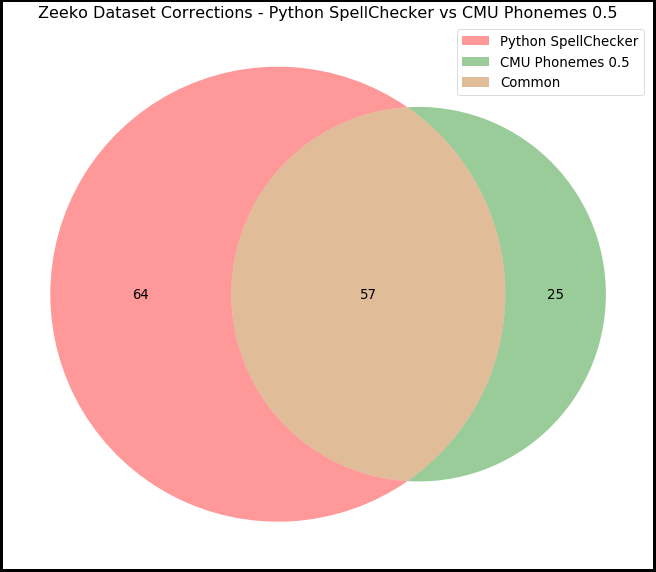

In [177]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(15,12), dpi=60)
venn2(subsets=(64,25,57), set_labels=('','',''))
plt.legend(labels=['Python SpellChecker', 'CMU Phonemes 0.5','Common'])
plt.title('Zeeko Dataset Corrections - Python SpellChecker vs CMU Phonemes 0.5')
plt.show()

In [163]:
overlap(zeeko_symspell, zeeko_phonemes, 'symspell', 'cmu_phonemes', 'zeeko', 'symspell_cmu_phonemes')

{'both': 62, 'symspell': 65, 'cmu_phonemes': 23}

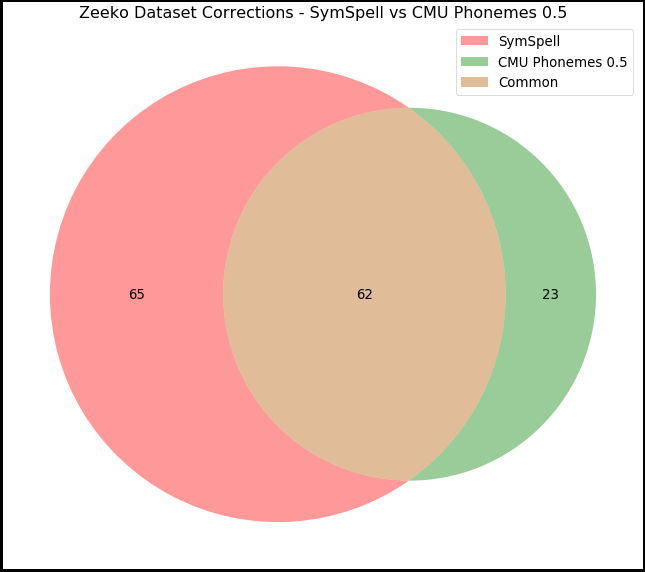

In [180]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(15,12), dpi=60)
venn2(subsets=(65,23,62), set_labels=('','',''))
plt.legend(labels=['SymSpell', 'CMU Phonemes 0.5','Common'])
plt.title('Zeeko Dataset Corrections - SymSpell vs CMU Phonemes 0.5')
plt.show()

# aspell

In [207]:
file_name_a_pyspell = Path(input_path_files) / "aspell_pyspell_dict.txt"
aspell_pyspell = pickle.load(open(file_name_a_pyspell, "rb"))

file_name_a_symspell = Path(input_path_files) / "aspell_symspell_dict.txt"
aspell_symspell = pickle.load(open(file_name_a_symspell, "rb"))

file_name_a_phonemes = Path(input_path_files) / "aspell_phonemes_sym.txt"
aspell_phonemes = pickle.load(open(file_name_a_phonemes, "rb"))

In [208]:
df_spellcheck_vs_cmu = pd.DataFrame(columns=['Spelling Application', 'Correct', 'Luck', 'Correct_and_Luck'])
results_data = []
results_data.append(score_application('PySpell', aspell_pyspell))
results_data.append(score_application('CMU Phonemes', aspell_phonemes))
results_data.append(score_application('SymSpell', aspell_symspell))

In [209]:
df_spellcheck_vs_cmu.append(results_data)

,Spelling Application,Correct,Luck,Correct_and_Luck
0,PySpell,250,315,565
1,CMU Phonemes,185,17,202
2,SymSpell,274,169,443


In [239]:
print("PySpell Accuracy:",250/len(aspell_phonemes)*100)
print("SymSpell Accuracy:",274/len(aspell_phonemes)*100)
print("Phonemes Accuracy:",185/len(aspell_phonemes)*100)

PySpell Accuracy: 48.54368932038835
SymSpell Accuracy: 53.20388349514563
Phonemes Accuracy: 35.92233009708738


In [211]:
overlap(aspell_pyspell, aspell_phonemes, 'pyspell', 'cmu_phonemes', 'aspell', 'pyspell_cmu_phonemes')

{'both': 117, 'pyspell': 133, 'cmu_phonemes': 68}

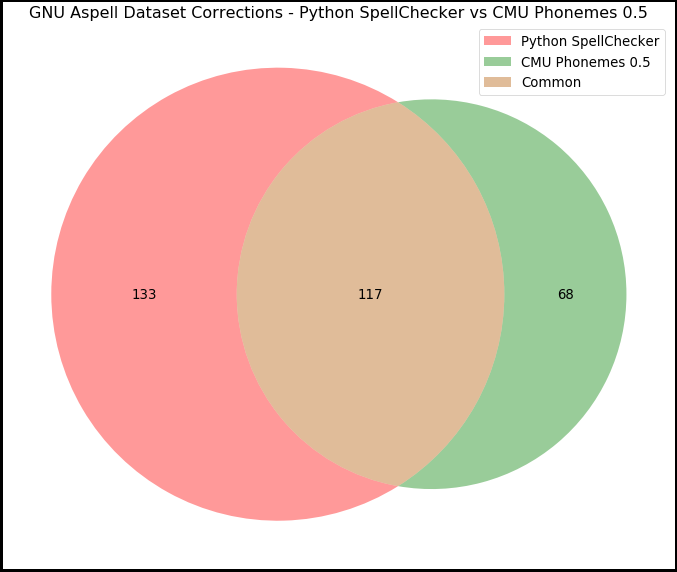

In [212]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(15,12), dpi=60)
venn2(subsets=(133,68,117), set_labels=('','',''))
plt.legend(labels=['Python SpellChecker', 'CMU Phonemes 0.5','Common'])
plt.title('GNU Aspell Dataset Corrections - Python SpellChecker vs CMU Phonemes 0.5')
plt.show()

In [228]:
overlap(aspell_symspell, aspell_phonemes, 'symspell', 'cmu_phonemes', 'aspell', 'symspell_cmu_phonemes')

{'both': 135, 'symspell': 139, 'cmu_phonemes': 50}

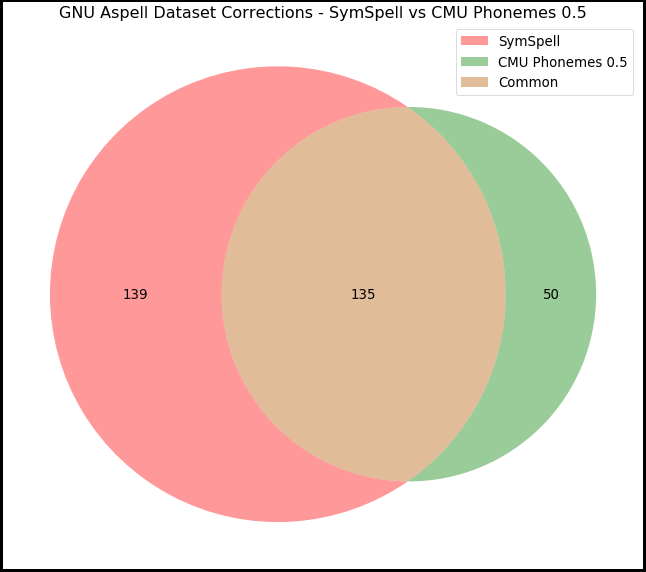

In [229]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(15,12), dpi=60)
venn2(subsets=(139,50,135), set_labels=('','',''))
plt.legend(labels=['SymSpell', 'CMU Phonemes 0.5','Common'])
plt.title('GNU Aspell Dataset Corrections - SymSpell vs CMU Phonemes 0.5')
plt.show()

# wiki

In [230]:
file_name_w_pyspell = Path(input_path_files) / "wiki_pyspell_dict.txt"
wiki_pyspell = pickle.load(open(file_name_w_pyspell, "rb"))

file_name_w_symspell = Path(input_path_files) / "wiki_symspell_dict.txt"
wiki_symspell = pickle.load(open(file_name_w_symspell, "rb"))

file_name_w_phonemes = Path(input_path_files) / "wiki_phonemes_sym.txt"
wiki_phonemes = pickle.load(open(file_name_w_phonemes, "rb"))

In [231]:
df_spellcheck_vs_cmu = pd.DataFrame(columns=['Spelling Application', 'Correct', 'Luck', 'Correct_and_Luck'])
results_data = []
results_data.append(score_application('PySpell', wiki_pyspell))
results_data.append(score_application('CMU Phonemes', wiki_phonemes))
results_data.append(score_application('SymSpell', wiki_symspell))

In [217]:
df_spellcheck_vs_cmu.append(results_data)

,Spelling Application,Correct,Luck,Correct_and_Luck
0,PySpell,1740,1956,3696
1,CMU Phonemes,1123,17,1140
2,SymSpell,1806,669,2475


In [238]:
print("PySpell Accuracy:",1740/len(wiki_phonemes)*100)
print("SymSpell Accuracy:",1806/len(wiki_phonemes)*100)
print("Phonemes Accuracy:",1123/len(wiki_phonemes)*100)

PySpell Accuracy: 78.02690582959642
SymSpell Accuracy: 80.98654708520179
Phonemes Accuracy: 50.35874439461884


In [232]:
overlap(wiki_pyspell, wiki_phonemes, 'pyspell', 'cmu_phonemes', 'wiki', 'pyspell_cmu_phonemes')

{'both': 940, 'pyspell': 800, 'cmu_phonemes': 183}

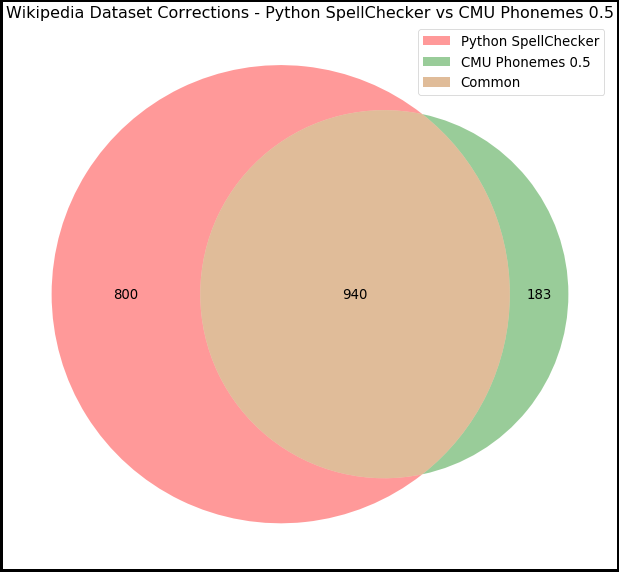

In [233]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(15,12), dpi=60)
venn2(subsets=(800,183,940), set_labels=('','',''))
plt.legend(labels=['Python SpellChecker', 'CMU Phonemes 0.5','Common'])
plt.title('Wikipedia Dataset Corrections - Python SpellChecker vs CMU Phonemes 0.5')
plt.show()

In [235]:
overlap(wiki_symspell, wiki_phonemes, 'symspell', 'cmu_phonemes', 'wiki', 'symspell_cmu_phonemes')

{'both': 967, 'symspell': 839, 'cmu_phonemes': 156}

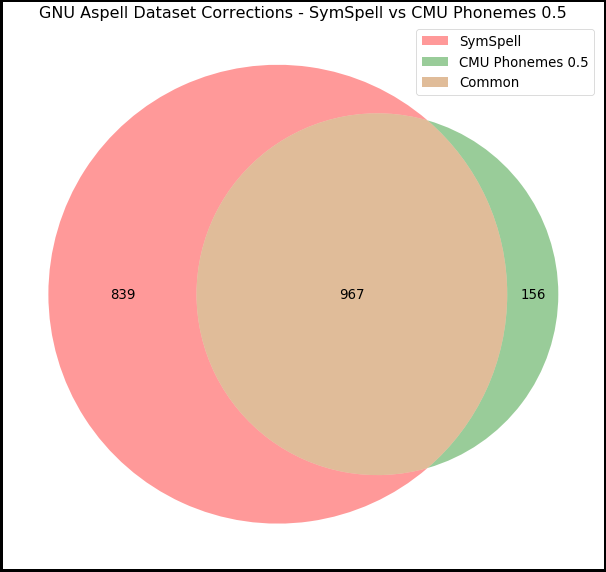

In [236]:
plt.figure(linewidth=5, edgecolor="black", facecolor="white", figsize=(15,12), dpi=60)
venn2(subsets=(839,156,967), set_labels=('','',''))
plt.legend(labels=['SymSpell', 'CMU Phonemes 0.5','Common'])
plt.title('GNU Aspell Dataset Corrections - SymSpell vs CMU Phonemes 0.5')
plt.show()